In [2]:
# import library and data
import pandas as pd
import numpy as np
import os

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.stattools import adfuller 
from statsmodels.stats.diagnostic import acorr_ljungbox  
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.api import OLS, add_constant

import matplotlib.pyplot as plt
import seaborn as sns

# Granger Causality Test Built in Python
from statsmodels.tsa.stattools import grangercausalitytests

In [5]:
def std(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

def load_sentiment_data(data_path='./statistical_analysis_data',
                       na_option='drop'):
    loaded_data = {}
    
    all_files = os.listdir(data_path)
    for file in all_files:
        df = pd.read_excel(data_path+'/'+file)
        df.set_index('Date', inplace=True)
        if na_option == 'zero':
            df = df.iloc[1:, :].fillna(0) # drop fisrt obs, fill na as 0
        elif na_option == 'drop':
            df = df.iloc[1:, :].dropna()
            if len(df) == 0: 
                print('No observations for: ', file.split(".")[0])
        # add a column of sentiment difference
        df['sentiment_df'] = np.nan_to_num(df['senti_rela_score'] - \
                             df['senti_rela_score'].shift(1))
        # add a column of standarized sentiment
        df['senti_rela_std'] = std(df['senti_rela_score'])
        df['volume_std'] = std(df['Volume'])
        df['volatility_std'] = std(df['volatility'])
        
        
        loaded_data[file.split(".")[0]] = df
    return loaded_data

sentiment_data = load_sentiment_data()
sentiment_data['ALGN']

,Last Price,Volume,log_return,excess_log_return,volatility,tweets_num,senti_abs_score,senti_rela_score,sentiment_df,senti_rela_std,volume_std,volatility_std
Date,,,,,,,,,,,,
2020-11-30 11:30:00,477.3900,3100,0.002202,0.005062,0.570552,1.0,1.0,1.000000,0.000000,0.638214,-0.545030,0.289313
2020-11-30 14:30:00,477.1300,300,-0.005122,-0.006063,0.528032,2.0,1.0,1.000000,0.000000,0.638214,-0.999193,0.006385
2020-12-01 09:30:00,487.3100,27392,0.022181,0.012629,0.608421,23.0,6.0,0.428571,-0.571429,-0.535896,3.395159,0.541292
2020-12-01 12:30:00,501.5600,4225,-0.010492,-0.010356,0.698142,4.0,3.0,1.000000,0.571429,0.638214,-0.362554,1.138295
2020-12-01 14:30:00,499.9075,5867,-0.004058,-0.004030,0.693338,1.0,1.0,1.000000,0.000000,0.638214,-0.096219,1.106330
2020-12-01 15:30:00,499.1100,9024,-0.001597,0.001378,0.680315,1.0,-1.0,-1.000000,-2.000000,-3.471171,0.415849,1.019678
2020-12-02 09:30:00,494.8050,6837,-0.008663,-0.004775,0.632218,12.0,6.0,0.750000,1.750000,0.124541,0.061116,0.699640
2020-12-02 13:30:00,503.1600,2541,-0.001291,-0.000963,0.695638,1.0,1.0,1.000000,0.250000,0.638214,-0.635700,1.121639
2020-12-03 09:30:00,510.0000,15654,0.009456,0.008311,0.678217,18.0,7.0,0.636364,-0.363636,-0.108947,1.491243,1.005717


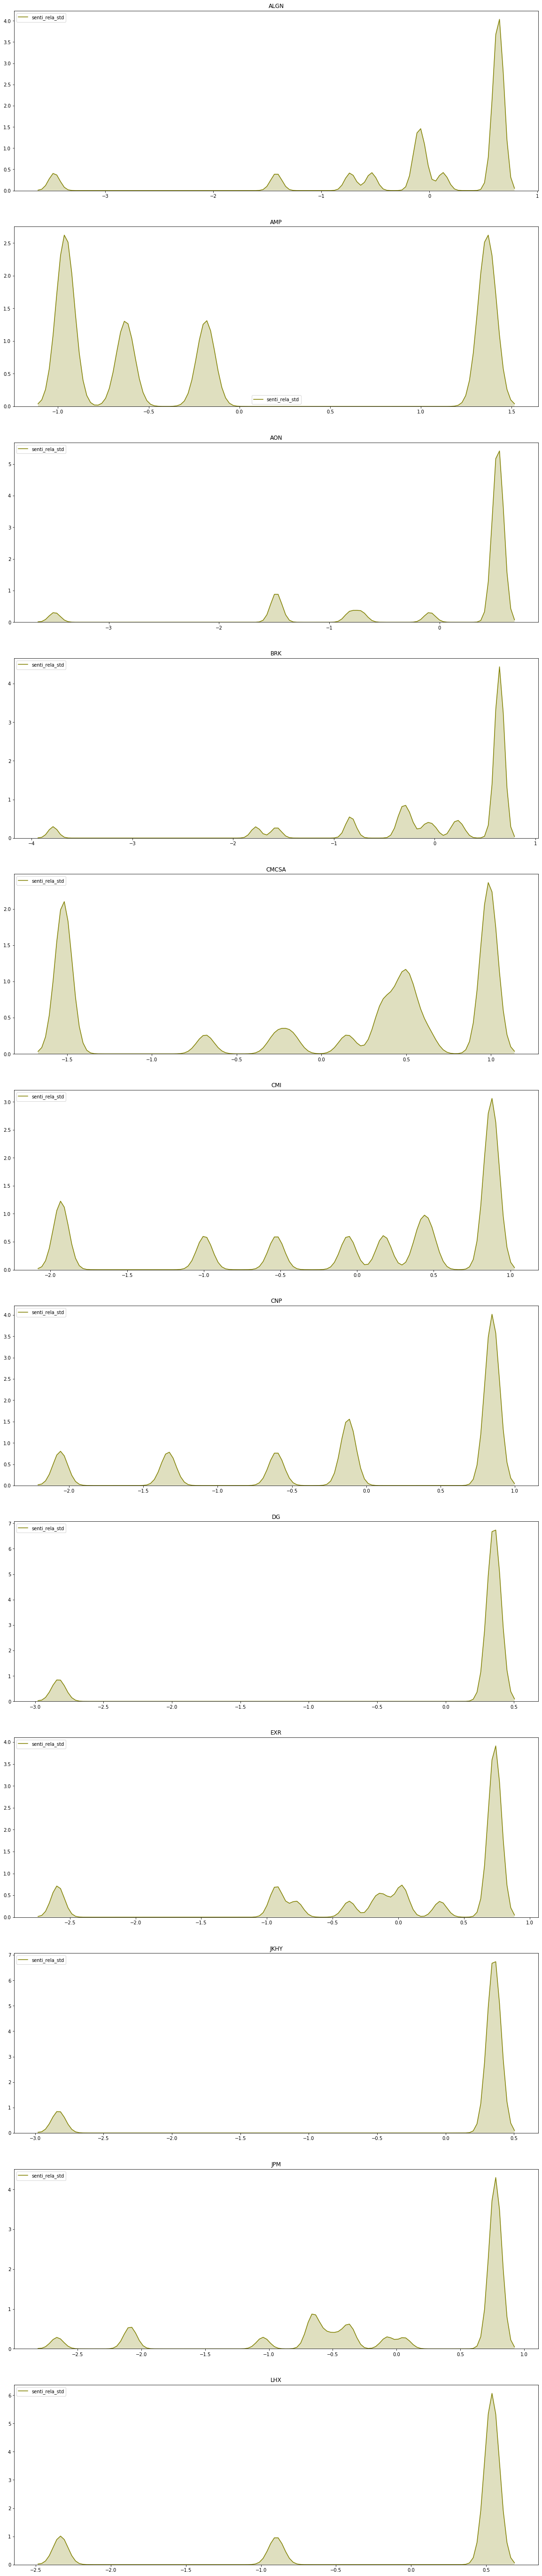

In [6]:
def plot_kernal_sentiment_density(sentiment_data):
    # plot the distribution of sentiment score
    n_company = len(sentiment_data)
    fig, axs = plt.subplots(n_company, figsize=(20,100))
    i = 0
    for company, df in sentiment_data.items():
        sentiment = df['senti_rela_std']
        sns.kdeplot(sentiment, shade=True, 
                    bw=.05, color="olive", ax=axs[i])
        axs[i].set_title(company)
        i += 1

plot_kernal_sentiment_density(sentiment_data)

In [7]:
# statistical analysis
# granger causality test
def gc_test(company_name, company_df, 
            response='volume_std', X='senti_rela_std'):
    test_array = company_df.loc[:, [response, X]]
    
    test_result = grangercausalitytests(test_array, maxlag=1)
    
    return test_result

def gc_test_all(sentiment_data, response='volume_std', 
                X='senti_rela_std'):
    test_result = {}
    print("test for granger casaulity: ", response, 'and', X)
    
    for name, df in sentiment_data.items():
        print("\n next result \n")

        try:
            print("company: ", name)
            r = gc_test(name, df, response, X)
            test_result[name] = r
        except ValueError:
            print("Insufficient observations", name)
            test_result[name] = None

In [8]:
test1 = gc_test_all(sentiment_data, 
                    response='volume_std', X='senti_rela_std')
test1

test for granger casaulity:  volume_std and senti_rela_std

 next result 

company:  ALGN

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3198  , p=0.5801  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.3838  , p=0.5356  , df=1
likelihood ratio test: chi2=0.3798  , p=0.5377  , df=1
parameter F test:         F=0.3198  , p=0.5801  , df_denom=15, df_num=1

 next result 

company:  AMP

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3739  , p=0.3619  , df_denom=2, df_num=1
ssr based chi2 test:   chi2=3.4349  , p=0.0638  , df=1
likelihood ratio test: chi2=2.6147  , p=0.1059  , df=1
parameter F test:         F=1.3739  , p=0.3619  , df_denom=2, df_num=1

 next result 

company:  AON

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3907  , p=0.5387  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.4465  , p=0.5040  , df=1
likelihood ratio test: chi2=0.4424  , p=0.5060  , df=1
parameter F test:       

In [9]:
test1 = gc_test_all(sentiment_data, 
                    response='log_return', X='senti_rela_std')
test2

test for granger casaulity:  log_return and senti_rela_std

 next result 

company:  ALGN

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2517  , p=0.2808  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=1.5021  , p=0.2204  , df=1
likelihood ratio test: chi2=1.4427  , p=0.2297  , df=1
parameter F test:         F=1.2517  , p=0.2808  , df_denom=15, df_num=1

 next result 

company:  AMP

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3517  , p=0.3649  , df_denom=2, df_num=1
ssr based chi2 test:   chi2=3.3793  , p=0.0660  , df=1
likelihood ratio test: chi2=2.5816  , p=0.1081  , df=1
parameter F test:         F=1.3517  , p=0.3649  , df_denom=2, df_num=1

 next result 

company:  AON

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0149  , p=0.9039  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.0171  , p=0.8961  , df=1
likelihood ratio test: chi2=0.0170  , p=0.8961  , df=1
parameter F test:       

NameError: name 'test2' is not defined

In [10]:
test3 = gc_test_all(sentiment_data, 
                    response='volatility', X='senti_rela_std')
test3

test for granger casaulity:  volatility and senti_rela_std

 next result 

company:  ALGN

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4497  , p=0.5127  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.5397  , p=0.4626  , df=1
likelihood ratio test: chi2=0.5317  , p=0.4659  , df=1
parameter F test:         F=0.4497  , p=0.5127  , df_denom=15, df_num=1

 next result 

company:  AMP

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7208  , p=0.4853  , df_denom=2, df_num=1
ssr based chi2 test:   chi2=1.8019  , p=0.1795  , df=1
likelihood ratio test: chi2=1.5389  , p=0.2148  , df=1
parameter F test:         F=0.7208  , p=0.4853  , df_denom=2, df_num=1

 next result 

company:  AON

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8321  , p=0.3720  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.9509  , p=0.3295  , df=1
likelihood ratio test: chi2=0.9326  , p=0.3342  , df=1
parameter F test:       